In [ ]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 12.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

from plotnine import *
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import folium

import warnings
warnings.filterwarnings('ignore')

In [ ]:
shop_2022 = pd.read_csv('/content/drive/MyDrive/KDT /소상공인시장진흥공단_상가(상권)정보_서울_202212.csv', encoding='utf-8-sig')
shop_2022.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,...,1156010600100410002034626,NaN,서울특별시 영등포구 영중로14길 11-17,150035,7250.0,NaN,1,NaN,126.907168,37.520613
1,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,...,1120012200101420011000227,NaN,서울특별시 성동구 용답5길 2,133849,4803.0,NaN,NaN,NaN,127.049018,37.566857
2,24715368,태평양진주,NaN,D,소매,D26,시계/귀금속소매,D26A01,시계/귀금속,G47830,...,1111015200100440000000001,금사랑투빌딩,서울특별시 종로구 서순라길 17-10,110390,3138.0,NaN,NaN,NaN,126.993530,37.571848
3,15554136,김선희꼼꼼국어교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,...,1171011100101970003017195,NaN,서울특별시 송파구 위례성대로12길 31,138834,5640.0,NaN,2,NaN,127.121520,37.510967
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375


In [ ]:
cafe_df = shop_2022[shop_2022['상호명'].str.contains('이디야|ediya|EDIYA|스타벅스|starbucks|STARBUCKS')].copy()

In [ ]:
gang_buk = ['은평구','서대문구','마포구','종로구','중구','용산구','성북구','강북구','동대문구','광진구','성동구','중랑구','노원구','도봉구']
gang_nam = ['강서구','양천구','구로구','영등포구','동작구','관악구','금천구','서초구','강남구','송파구','강동구']

# 스타벅스와 이디야의 상호명 컬럼 만들기
cafe_df.loc[cafe_df['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'),'브랜드명'] = '스타벅스'
cafe_df['브랜드명'].fillna('이디야',inplace = True)

# 구 별로 강남 강북 컬럼 만들기
for i in cafe_df['시군구명']:
  if i in gang_buk:
    cafe_df.loc[cafe_df['시군구명'] == i,'지역'] = '강북'
  else:
    cafe_df.loc[cafe_df['시군구명'] == i,'지역'] = '강남'

cafe_df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,브랜드명,지역
1109,25435527,이디야커피,신길역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,서울특별시 영등포구 영등포로 353,150050,7318.0,NaN,1,NaN,126.918062,37.515118,이디야,강남
1458,20015522,이디야커피,라이프점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,서울특별시 영등포구 63로 40,150731,7345.0,NaN,1,NaN,126.939198,37.519544,이디야,강남
1508,20585779,스타벅스,동숭로아트점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,서울특별시 종로구 동숭길 110,110809,3085.0,NaN,3,NaN,127.003887,37.582964,스타벅스,강북
2352,23252025,이디야커피양재AT점,양재AT점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,서울특별시 서초구 동산로 3,137130,6779.0,NaN,1,NaN,127.040265,37.469075,이디야,강남
2422,20731751,이디야커피,시흥점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,서울특별시 금천구 금하로 750,153784,8645.0,1,NaN,NaN,126.913646,37.449066,이디야,강남


In [ ]:
cafe_df[['상호명', '브랜드명', '지역']]

,상호명,브랜드명,지역
1109,이디야커피,이디야,강남
1458,이디야커피,이디야,강남
1508,스타벅스,스타벅스,강북
2352,이디야커피양재AT점,이디야,강남
2422,이디야커피,이디야,강남
...,...,...,...
364946,이디야커피,이디야,강남
367768,이디야커피,이디야,강남
368908,이디야커피,이디야,강북
369284,이디야커피,이디야,강남


In [ ]:
# 강남, 강북 DataFrame 나누기기
gang_nam_df = cafe_df[cafe_df['지역'].str.contains('강남')].copy()
gang_buk_df = cafe_df[cafe_df['지역'].str.contains('강북')].copy()

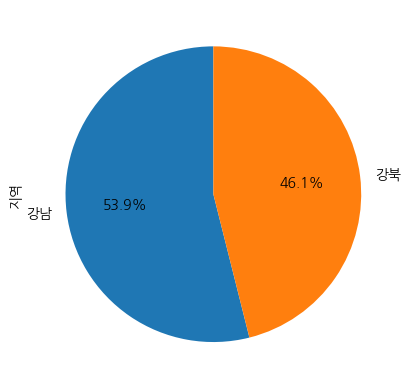

In [ ]:
cafe_df['지역'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90)
plt.show()

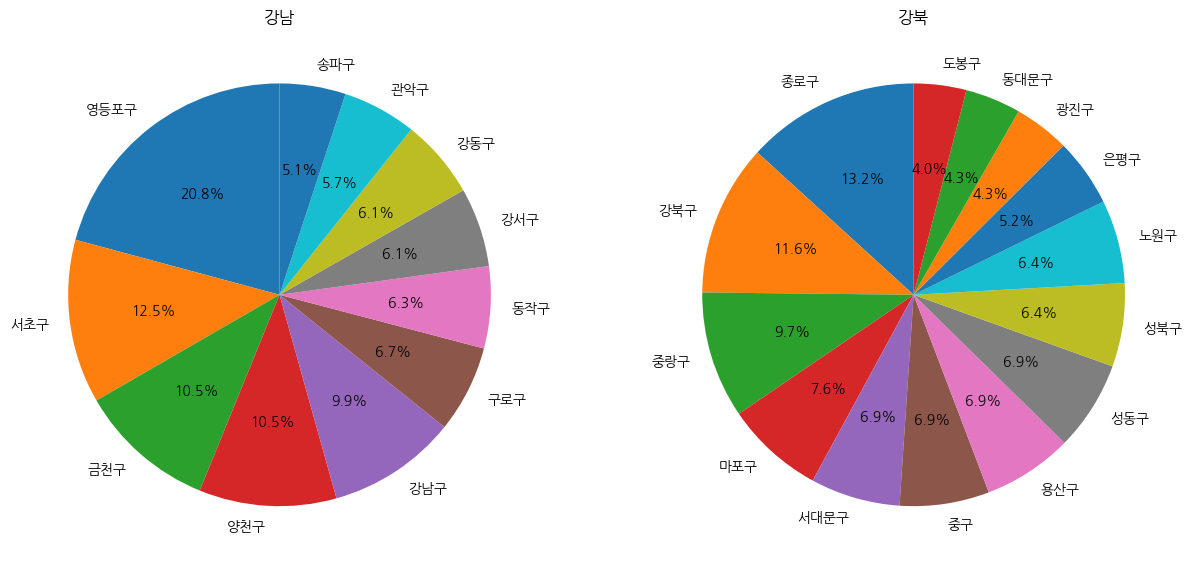

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

fig, axs = plt.subplots(1, 2, figsize=(15,10)) #

axs[0].pie(gang_nam_df['시군구명'].value_counts(),labels=gang_nam_df['시군구명'].unique(),autopct = '%1.1f%%', startangle=90)

axs[1].pie(gang_buk_df['시군구명'].value_counts(),labels=gang_buk_df['시군구명'].unique(),autopct = '%1.1f%%', startangle=90)

axs[0].set_title('강남')
axs[1].set_title('강북')

plt.show()


In [ ]:
cafe_gang_nam_cnt = gang_nam_df['브랜드명'].value_counts()
cafe_gang_nam_df_ratio = cafe_gang_nam_cnt[0]/cafe_gang_nam_cnt[1]

cafe_gang_buk_cnt = gang_buk_df['브랜드명'].value_counts()
cafe_gang_buk_df_ratio = cafe_gang_buk_cnt[0]/cafe_gang_buk_cnt[1]

print(f'제공된 데이터로 봤을 때 강남에는 스타벅스가 이디야보다 매장이 {round(cafe_gang_nam_df_ratio,2)}배 가량 많습니다')
print(f'제공된 데이터로 봤을 때 강북에는 이디야가 스타벅스보다 매장이 {round(cafe_gang_buk_df_ratio,2)}배 가량 많습니다')

제공된 데이터로 봤을 때 강남에는 스타벅스가 이디야보다 매장이 1.1배 가량 많습니다
제공된 데이터로 봤을 때 강북에는 이디야가 스타벅스보다 매장이 1.02배 가량 많습니다


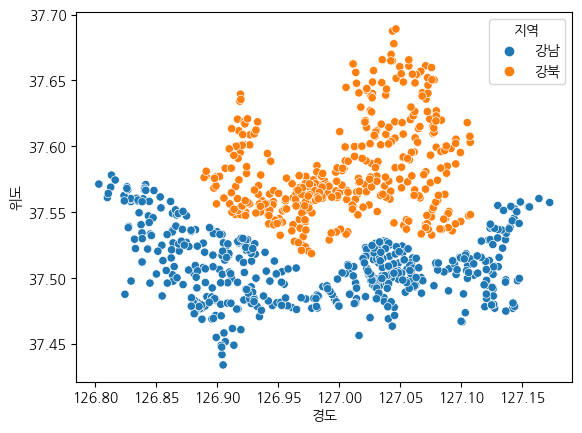

In [ ]:
# 스캐터로 본 강남, 강북의 카페 수
sns.scatterplot(data=cafe_df,x='경도',y='위도',hue='지역')
plt.show()

In [ ]:
# 서울의 강남 3개 구 강북 3개구 총 여섯개 구를 표시함

gang_top3_df = cafe_df[cafe_df['시군구명'].str.contains('영등포구|서초구|금천구|종로구|강북구|중랑구')].copy()


geo_df = gang_top3_df.copy()

map = folium.Map(location=[geo_df['위도'].mean(),geo_df['경도'].mean()], zoom_start=11)

for n in geo_df.index:
  # 팝업에 들어갈 텍스트 지정
  popup_name = geo_df.loc[n, '브랜드명'] + ' - ' +  geo_df.loc[n, '도로명주소']

  # 브랜드명에 따라 아이콘 색상을 다르게 설정정
  icon_color ='blue'

  if geo_df.loc[n, '브랜드명'] == '스타벅스':
    icon_color = 'green'

  folium.Marker([geo_df.loc[n, '위도'],geo_df.loc[n, '경도']],
                popup = popup_name,
                icon= folium.Icon(color=icon_color, icon='coffee', prefix='fa')).add_to(map)

map

IndexError: ignored

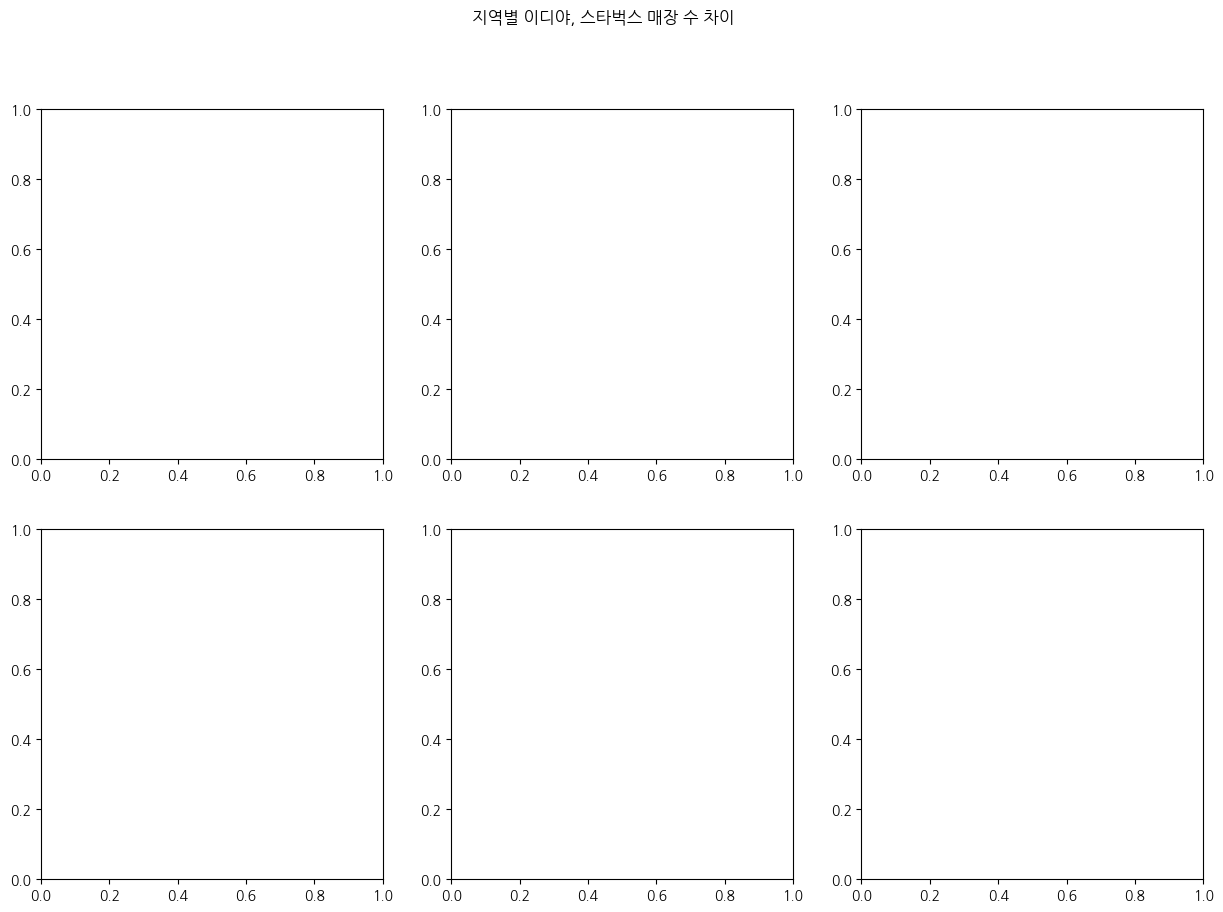

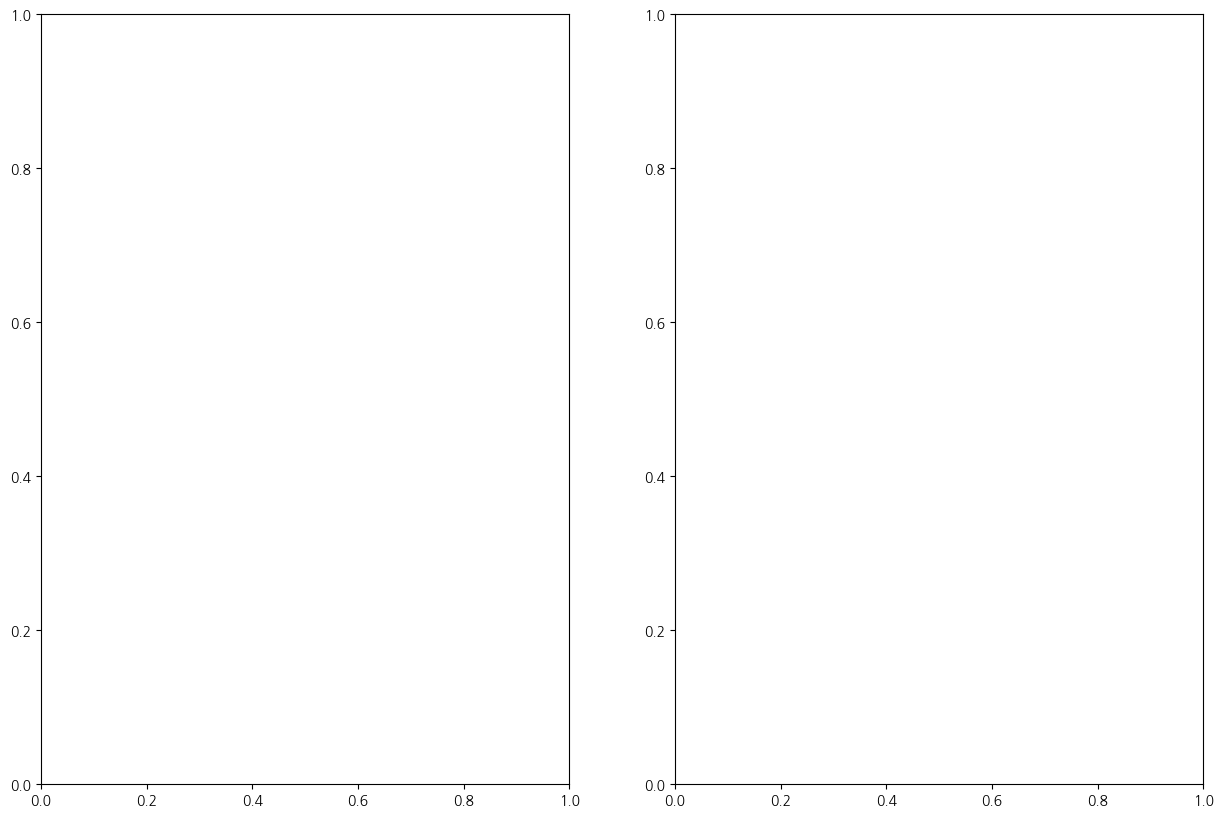

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(15,10))
fig.suptitle('지역별 이디야, 스타벅스 매장 수 차이')

fig, axs = plt.subplots(1,2, figsize=(15,10))
axs[0,0].pie(gang_top3_df[gang_top3_df['시군구명'].str.contains('영등포구')].value_counts(),labels=gang_nam_df['지역'].unique(),autopct = '%1.1f%%', startangle=90)
axs[1,0].pie(gang_top3_df[gang_top3_df['시군구명'].str.contains('서초구')].value_counts(),labels=gang_buk_df['지역'].unique(),autopct = '%1.1f%%', startangle=90)
axs[2,0].pie(gang_top3_df[gang_top3_df['시군구명'].str.contains('금천구')].value_counts(),labels=gang_buk_df['지역'].unique(),autopct = '%1.1f%%', startangle=90)

axs[0,0].pie(gang_top3_df[gang_top3_df['시군구명'].str.contains('종로구')].value_counts(),labels=gang_nam_df['지역'].unique(),autopct = '%1.1f%%', startangle=90)
axs[0,1].pie(gang_top3_df[gang_top3_df['시군구명'].str.contains('강북구')].value_counts(),labels=gang_buk_df['지역'].unique(),autopct = '%1.1f%%', startangle=90)
axs[0,2].pie(gang_top3_df[gang_top3_df['시군구명'].str.contains('중랑구')].value_counts(),labels=gang_buk_df['지역'].unique(),autopct = '%1.1f%%', startangle=90)

axs[0].set_title('강남')


ValueError: ignored

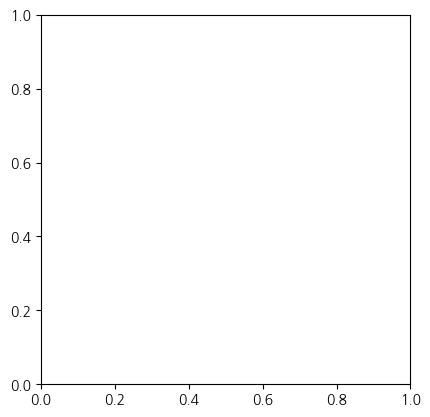

In [ ]:
plt.pie(gang_top3_df[gang_top3_df['시군구명'].str.contains('영등포구')],labels=gang_top3_df['브랜드명'].unique(),autopct = '%1.1f%%', startangle=90)
